# Data Cleansing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df=pd.read_csv(r"C:\Users\ophir\OneDrive\Desktop\TMDB_tv_dataset_v3.csv")

In [1]:
df

NameError: name 'df' is not defined

In [ ]:
# Get value counts for 'number_of_seasons' and display the first 20 categories
value_counts = df['number_of_seasons'].value_counts().sort_index().head(20)
value_counts

number_of_seasons
0      22428
1     114026
2      14484
3       6069
4       3290
5       1987
6       1296
7        921
8        739
9        547
10       443
11       334
12       273
13       226
14       172
15       171
16       139
17       112
18        92
19       101
Name: count, dtype: int64

Creating a continuous_df for continuous values

In [ ]:
# Selecting only numeric continuous columns (excluding categorical and discrete)
# In most cases, continuous variables are numeric and float types
continuous_df = df.select_dtypes(include=['float64', 'int64'])
continuous_df = continuous_df.astype({col: 'float64' for col in continuous_df.select_dtypes(include='int64').columns})

# Display the small dataset with only numeric continuous data
continuous_df

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
0,1399.0,8.0,73.0,21857.0,8.442,1083.917,0.0
1,71446.0,3.0,41.0,17836.0,8.257,96.354,70.0
2,66732.0,4.0,34.0,16161.0,8.624,185.711,0.0
3,1402.0,11.0,177.0,15432.0,8.121,489.746,42.0
4,63174.0,6.0,93.0,13870.0,8.486,416.668,45.0
...,...,...,...,...,...,...,...
168634,239099.0,1.0,1.0,0.0,0.000,1.400,0.0
168635,241205.0,1.0,1.0,0.0,0.000,0.600,0.0
168636,240696.0,1.0,1.0,0.0,0.000,1.895,0.0
168637,240697.0,1.0,1.0,0.0,0.000,0.600,0.0


continuous numbers df

In [ ]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  168639 non-null  float64
 1   number_of_seasons   168639 non-null  float64
 2   number_of_episodes  168639 non-null  float64
 3   vote_count          168639 non-null  float64
 4   vote_average        168639 non-null  float64
 5   popularity          168639 non-null  float64
 6   episode_run_time    168639 non-null  float64
dtypes: float64(7)
memory usage: 9.0 MB


Target Value Boxplot

<Axes: xlabel='popularity'>

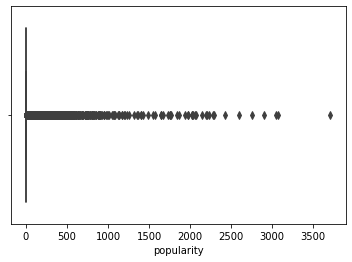

In [ ]:
sns.boxplot(df['popularity'])

Target Value after log scale

C:\Users\ophir\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='popularity'>

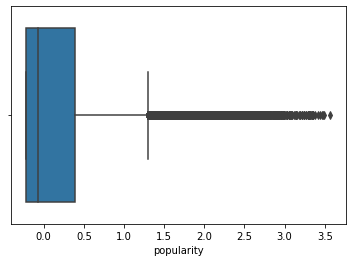

In [ ]:
target_pop_log=np.log10(df['popularity'])
sns.boxplot(target_pop_log)

In [ ]:
continuous_df_log=np.log10(continuous_df)

C:\Users\ophir\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


# Outliers

C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


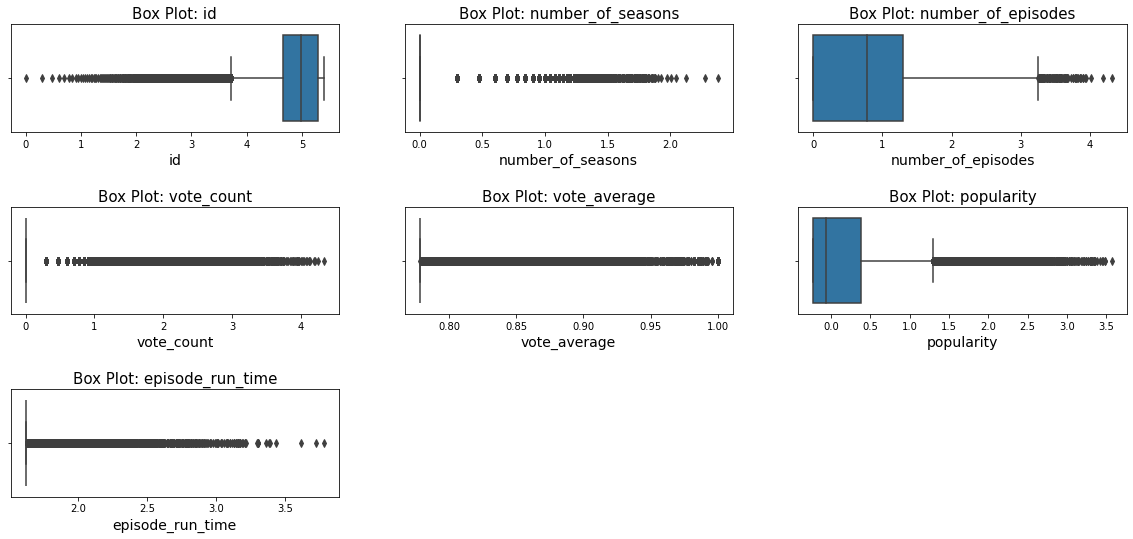

In [ ]:
# Define the function to plot box plots for each numeric column
def outliers_boxplot(df):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(df.columns):
        ax = plt.subplot(60, 3, i + 1)
        sns.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()

# Assuming con_df contains the continuous numeric columns
outliers_boxplot(continuous_df_log)

In [ ]:
continuous_df_log

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
0,NaN,NaN,1.863323,4.339591,0.926445,3.034996,-inf
1,4.853978,NaN,1.612784,4.251297,0.916822,1.983870,1.845098
2,4.824334,NaN,1.531479,4.208468,0.935709,2.268838,-inf
3,NaN,NaN,2.247973,4.188422,0.909610,2.689971,1.623249
4,4.800538,NaN,1.968483,4.142076,0.928703,2.619790,1.653213
...,...,...,...,...,...,...,...
168634,5.378578,0.0,0.000000,-inf,-inf,0.146128,-inf
168635,5.382386,0.0,0.000000,-inf,-inf,-0.221849,-inf
168636,5.381469,0.0,0.000000,-inf,-inf,0.277609,-inf
168637,5.381471,0.0,0.000000,-inf,-inf,-0.221849,-inf


### IQR Outliers

In [ ]:
# Function to identify outliers using IQR on LOG-transformed data
def treat_outliers(continuous_df_log, features):
    outliers_df = pd.DataFrame(index=continuous_df_log.index)
    for feature in features:
        Q1 = continuous_df_log[feature].quantile(0.25)
        Q3 = continuous_df_log[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_df[feature] = ((continuous_df_log[feature] < lower_bound) |
                                (continuous_df_log[feature] > upper_bound)).astype(int)
    return outliers_df

# Apply the outlier treatment function to numeric (log) columns
outliers_df = treat_outliers(continuous_df_log, continuous_df_log.columns)

# Display the table
outliers_df


C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
168634,0,0,0,0,0,0,0
168635,0,0,0,0,0,0,0
168636,0,0,0,0,0,0,0
168637,0,0,0,0,0,0,0


In [ ]:
#Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed


In [ ]:
# Checking distribution and correlation changes

for col in outliers_df:
    out = continuous_df_log[col]
    non_out = continuous_df_log[col][outliers_df[col] == 0]
    cor_out = continuous_df_log['popularity']
    cor_non_out = continuous_df_log['popularity'][outliers_df[col] == 0]

    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)

    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] -
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)

C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ophir\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


In [ ]:
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed
0,id,1101,+,-
1,number_of_seasons,0,-,-
2,number_of_episodes,468,-,-
3,vote_count,0,-,-
4,vote_average,0,-,-
5,popularity,10261,+,-
6,episode_run_time,0,-,-


In [ ]:
# Add the 'drop' column based on the specified conditions
out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')

# Filter features where only distribution changes but not correlation
to_drop = out_df[out_df['drop'] == 'yes']['feature']

# Display the resulting DataFrame
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,id,1101,+,-,yes
1,number_of_seasons,0,-,-,no
2,number_of_episodes,468,-,-,no
3,vote_count,0,-,-,no
4,vote_average,0,-,-,no
5,popularity,10261,+,-,yes
6,episode_run_time,0,-,-,no


In [ ]:
to_drop

0            id
5    popularity
Name: feature, dtype: object

Remove Outliers

In [ ]:
# Build the drop list (exclude target 'popularity')
to_drop = out_df.loc[(out_df['drop'] == 'yes') & (out_df['feature'] != 'popularity'), 'feature'].tolist()

# Remove outliers (cell-wise) only for the selected features
df_cleaned = df.copy()
for col in to_drop:
    df_cleaned.loc[outliers_df[col] == 1, col] = np.nan
    # keep log frame in sync if exists
    if col in continuous_df_log.columns:
        continuous_df_log.loc[outliers_df[col] == 1, col] = np.nan

# Display the updated df_cleaned
df_cleaned

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399.0,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446.0,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732.0,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402.0,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174.0,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099.0,母乳酱想要喷出来,1,1,zh,0,0.000,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
168635,241205.0,Barbie Dream Squad,1,1,es,0,0.000,NaN,False,NaN,...,NaN,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN,0
168636,240696.0,Picasso,1,1,bn,0,0.000,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,NaN,Crime,NaN,bn,NaN,IN,বাংলা,NaN,India,0
168637,240697.0,女子大生危険なアルバイト,1,1,en,0,0.000,A college student gets into trouble when she m...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0


In [ ]:
# Save cleaned data
df_cleaned.to_pickle('df_cleaned.pkl')

# Missing Values

Now we use df_cleaned

<Axes: >

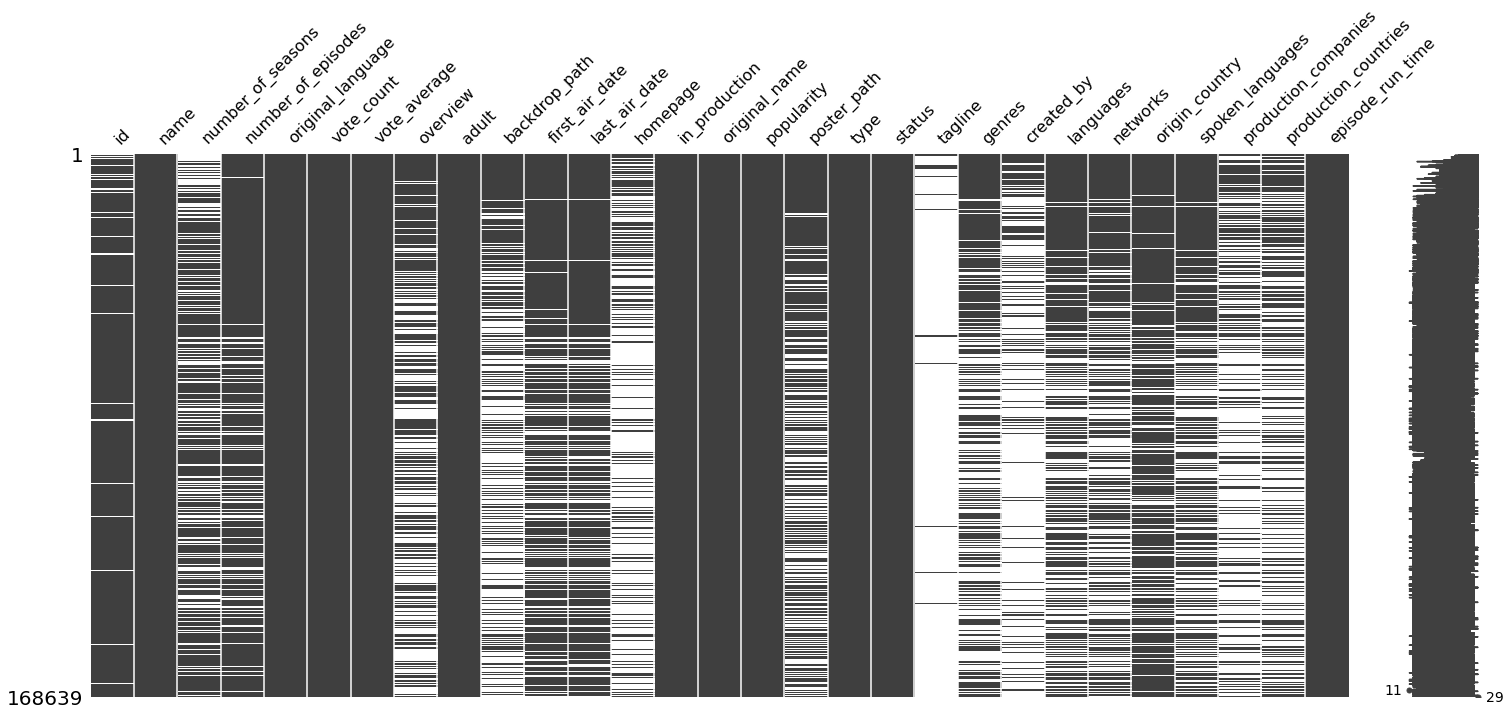

In [ ]:
import missingno as msno
msno.matrix(df_cleaned)

In [ ]:
df_nulls = df_cleaned.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,id,name,number_of_seasons,number_of_episodes,overview,backdrop_path,first_air_date,last_air_date,homepage,original_name,poster_path,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries
0,NaN,Game of Thrones,NaN,73.0,Seven noble families fight for control of the ...,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,http://www.hbo.com/game-of-thrones,Game of Thrones,/1XS1oqL89opfnbLl8WnZY1O1uJx.jpg,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America"
1,71446.0,Money Heist,NaN,41.0,"To carry out the biggest heist in history, a m...",/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,https://www.netflix.com/title/80192098,La Casa de Papel,/reEMJA1uzscCbkpeRJeTT2bjqUp.jpg,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain
2,66732.0,Stranger Things,NaN,34.0,"When a young boy vanishes, a small town uncove...",/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,https://www.netflix.com/title/80057281,Stranger Things,/49WJfeN0moxb9IPfGn8AIqMGskD.jpg,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America
3,NaN,The Walking Dead,NaN,177.0,Sheriff's deputy Rick Grimes awakens from a co...,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,http://www.amc.com/shows/the-walking-dead--100...,The Walking Dead,/n7PVu0hSz2sAsVekpOIoCnkWlbn.jpg,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America
4,63174.0,Lucifer,NaN,93.0,"Bored and unhappy as the Lord of Hell, Lucifer...",/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,https://www.netflix.com/title/80057918,Lucifer,/ekZobS8isE6mA53RAiGDG93hBxL.jpg,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099.0,母乳酱想要喷出来,1.0,1.0,NaN,NaN,2023-03-03,2023-03-03,NaN,母乳酱想要喷出来,NaN,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN
168635,241205.0,Barbie Dream Squad,1.0,1.0,NaN,NaN,NaN,2023-03-04,NaN,Barbie Dream Squad,/vvm7p60THjcYdnXnXfjCgwPeime.jpg,NaN,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN
168636,240696.0,Picasso,1.0,1.0,"Murder, art and a journalist's relentless ques...",/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,2023-11-30,2023-11-30,NaN,Picasso,/ifDs1gBunsaN3lAG4Imc94JcfVD.jpg,NaN,Crime,NaN,bn,NaN,IN,বাংলা,NaN,India
168637,240697.0,女子大生危険なアルバイト,1.0,1.0,A college student gets into trouble when she m...,NaN,1990-02-10,1990-02-10,NaN,女子大生危険なアルバイト,/9EO55cThzp98PaM9iVRoZPXjIZ8.jpg,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN


Missing Value precentage

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = df_nulls.isnull().mean() * 100

# Display the missing percentages
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column', 'Missing Percentage']
missing_percentage

,Column,Missing Percentage
0,id,2.931113
1,name,0.002965
2,number_of_seasons,32.384561
3,number_of_episodes,14.305113
4,overview,44.655151
5,backdrop_path,53.877810
6,first_air_date,18.818897
7,last_air_date,17.732553
8,homepage,69.759071
9,original_name,0.002965


60% missing we could consider using the null as an additional category:<br>

# Imputation with MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

final_df = df_cleaned.copy()
imp_cols = final_df.select_dtypes(include=['float64','int64']).columns

imputer = IterativeImputer(max_iter=10, random_state=42, min_value=0)
final_df[imp_cols] = imputer.fit_transform(final_df[imp_cols])

# optional safety: clip in case of tiny numerical drift
final_df[imp_cols] = final_df[imp_cols].clip(lower=0)

In [ ]:
final_df

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,0.0,Game of Thrones,1.0,73.0,en,21857.0,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0.0
1,71446.0,Money Heist,1.0,41.0,es,17836.0,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70.0
2,66732.0,Stranger Things,1.0,34.0,en,16161.0,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0.0
3,0.0,The Walking Dead,1.0,177.0,en,15432.0,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42.0
4,63174.0,Lucifer,1.0,93.0,en,13870.0,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099.0,母乳酱想要喷出来,1.0,1.0,zh,0.0,0.000,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,0.0
168635,241205.0,Barbie Dream Squad,1.0,1.0,es,0.0,0.000,NaN,False,NaN,...,NaN,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN,0.0
168636,240696.0,Picasso,1.0,1.0,bn,0.0,0.000,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,NaN,Crime,NaN,bn,NaN,IN,বাংলা,NaN,India,0.0
168637,240697.0,女子大生危険なアルバイト,1.0,1.0,en,0.0,0.000,A college student gets into trouble when she m...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0.0


In [ ]:
#Checking at the updated missing matrix

<Axes: >

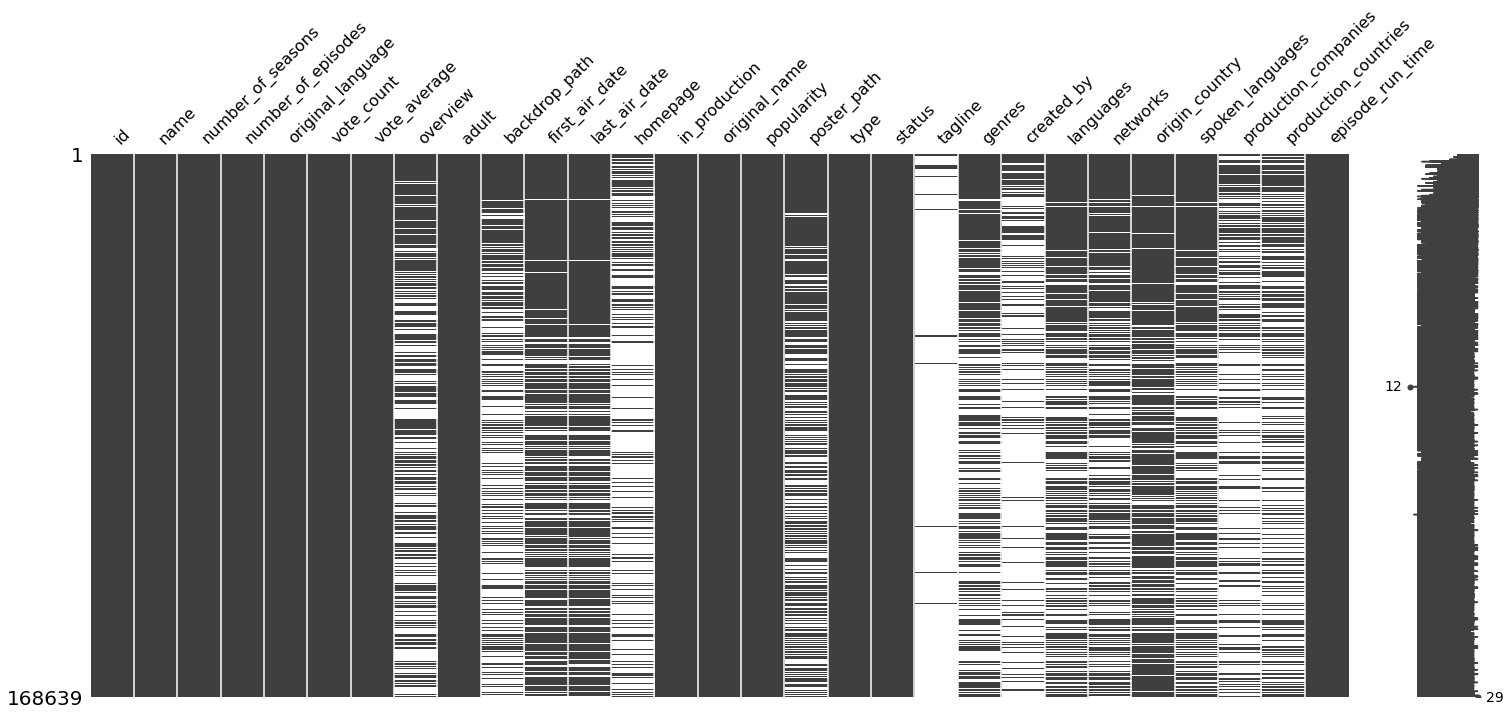

In [ ]:
msno.matrix(final_df)

In [ ]:
#Duable checking the cleansing
final_df.isnull().sum()

id                           0
name                         5
number_of_seasons            0
number_of_episodes           0
original_language            0
vote_count                   0
vote_average                 0
overview                 75306
adult                        0
backdrop_path            90859
first_air_date           31736
last_air_date            29904
homepage                117641
in_production                0
original_name                5
popularity                   0
poster_path              59902
type                         0
status                       0
tagline                 163309
genres                   68926
created_by              132143
languages                58589
networks                 71050
origin_country           31030
spoken_languages         59359
production_companies    109297
production_countries     91128
episode_run_time             0
dtype: int64

Further Imputation is requored for Categorical Values ....

In [ ]:
# Save cleaned data
final_df.to_pickle('final_df.pkl')

# Next to feature Engineering and Feature selection